## **Objectives of Session3a_Derivatives_and_Integration:**

1-To understand how to take derivatives and integrals by using library functions of python.<br>
2-To implement Numerical Differenciation methods to find values of f'(x) for a given table of x and f(x).<br>
3-To implement Numerical Integration methods to find values of definite integrals and their error bound by a specific method. 

## **How to take derivative in python:**

In [1]:
from sympy import* #Call Library of sympy
x = symbols('x')   #Make x a symbol  
f = 2*x**2+5       #Function to take derivative

df = diff(f, x,1)    #diff(f,x,1) is used to take first derivative of f w.r.t x
#df = diff(f, x,n)    #diff(f,x,1) is used to take nth derivative of f w.r.t x
print(df)
print(float(df.subs(x,1))) #df.subs(x,1) is used to substitute value of x=1 in above taken derivative

4*x
4.0


In [2]:
# another procedure for finding  derivative
y=sin(x)-x
derivative_y=y.diff(x) #differentiate y w.r.t x
print(derivative_y)

cos(x) - 1


**How to convert a sympy symbolic expression into numpy function to evaluate it on a point or array**.

In [3]:
f1=lambdify(x,f) #Now f1 is numpy function
print(f1(1)) #f1 at 1, you can also evaluate f1 at an array.
df1=lambdify(x,df)
print(df1(1)) 

7
4


**Task1**
```
a)Use above two procedures to find the second derivative of f(x)=x**2 exp(-x).
b)Convert symbolic expression in part (a) into numpy function.
c)Evaluate the numpy function (obtained in part b)at a single value and at an array.



```




In [4]:
#Solution of Task 1


#A
x=symbols('x')
f = x**2*exp(-x)
df = diff(f,x,2)
print("\nSecond Derivative is : " , df)
print("\nSecond Derivative at x=1 is : " , df.subs(x,1))
#B and C
f1 = lambdify(x, df)
print("\nSecond Derivative at x=1 is: ", f1(1))
l = [1,2,5]
for i in l:
  print("\nSecond Derivative at i=",i ," is: ", f1(i))


Second Derivative is :  (x**2 - 4*x + 2)*exp(-x)

Second Derivative at x=1 is :  -exp(-1)

Second Derivative at x=1 is:  -0.36787944117144233

Second Derivative at i= 1  is:  -0.36787944117144233

Second Derivative at i= 2  is:  -0.2706705664732254

Second Derivative at i= 5  is:  0.04716562899359827


## **Coding of some Numerical differentiation formulae**

### **Code of forward difference formula**

### Forward Differnce 
• $f'(x_0) =\dfrac{f(x_0+h)-f(x_0)}{h}$

### Backward Differnce 
• $f'(x_0) =\dfrac{f(x_0)-f(x_0-h)}{h}$



In [5]:
# code of forward difference formula.

import numpy as np
from tabulate import tabulate


def forward_diff(x, y):
  
    # Compute the step size h
    h = x[1] - x[0]
    data=[]
    
    # Compute the forward difference approximation
    fdf = np.zeros_like(y)
    fdf[-1] = (y[-1] - y[-2]) / h  # use backward difference at the end point
    for i in range(len(y) - 1):
        fdf[i] = (y[i+1] - y[i]) / h
        data.append([x[i],y[i],fdf[i]])
    data.append([x[-1],y[-1],fdf[-1]])
    
    print(tabulate(data,headers=['x','f(x)','df(x)/dx'],tablefmt="github"))
    
    return

In [16]:
# example to run above code
x=[0.2,0.4,0.6,0.8]
y=[3,3.9,3.98,4.2,4.28]
forward_diff(x, y)

|   x |   f(x) |   df(x)/dx |
|-----|--------|------------|
| 0.2 |   3    |        4.5 |
| 0.4 |   3.9  |        0.4 |
| 0.6 |   3.98 |        1.1 |
| 0.8 |   4.2  |        0.4 |
| 0.8 |   4.28 |        0.4 |


**Task 2: Write a code for Backward difference approximation (apply forward difference approximation on first point)**

In [11]:
#Code for backward difference

import numpy as np
from tabulate import tabulate


def backward_diff(x, y):
  
    # Compute the step size h
    h = x[1] - x[0]
    data=[]
    
    # Compute the backward difference approximation
    bdf = np.zeros_like(y)
    bdf[0] = (y[1] - y[0]) / h  # use forward difference at the end point
    data.append([x[0],y[0],bdf[0]])
    for i in range(1, len(x)):
        bdf[i] = (y[i] - y[i-1]) / h
        data.append([x[i],y[i],bdf[i]])
    
    
    print(tabulate(data,headers=['x','f(x)','df(x)/dx'],tablefmt="github"))
    
    return

    
# example to run above code
x=[0.2,0.4,0.6,0.8]
y=[3,3.9,3.98,4.2]
backward_diff(x, y)

|   x |   f(x) |   df(x)/dx |
|-----|--------|------------|
| 0.2 |   3    |        4.5 |
| 0.4 |   3.9  |        4.5 |
| 0.6 |   3.98 |        0.4 |
| 0.8 |   4.2  |        1.1 |


### **Code of three point endpoint and three point midpoint formula**
### Three-Point Endpoint Formula
• $f'(x_0) =\dfrac{−3f(x_0) + 4f(x_0 + h) - f (x_0 + 2h)}{2h}$
### Three-Point Midpoint Formula
• $f'(x_0) =\dfrac{f(x_0+h)-f(x_0-h)}{2h}$

In [12]:
# code for three point endpoint and three point midpoint formulae for finding f'(x) for an array of x and f(x).
import numpy as np

def three_point(x, y):
  
    # Compute the step size h
    data=[]
    h = x[1] - x[0]
    
    # Compute the forward difference approximation
    tp = np.zeros_like(y)
    tp[0]=(-3*y[0]+4*y[1]-y[2])/(2*h) #three point endpoint (left end) formula
    tp[-1]=(3*y[-1]-4*y[-2]+y[-3])/(2*h) #three point endpoint (right end) formula

    data.append([x[0],y[0],tp[0]])
    for i in range(1,len(y)-1):
        tp[i] = (y[i+1] - y[i-1]) / (2*h)
        data.append([x[i],y[i],tp[i]])
    data.append([x[-1],y[-1],tp[-1]])

    print(tabulate(data,headers=['x','f(x)','df(x)/dx'],tablefmt="github"))
    
    
    return

In [13]:
# example to run above code
x=[0.2,0.4,0.6,0.8]
y=[3,3.9,3.98,4.2]
three_point(x, y)


|   x |   f(x) |   df(x)/dx |
|-----|--------|------------|
| 0.2 |   3    |       6.55 |
| 0.4 |   3.9  |       2.45 |
| 0.6 |   3.98 |       0.75 |
| 0.8 |   4.2  |       1.45 |


**Task 3: 
Make a code for five point endpoint and midpoint formulae where possible in given table.**:


# **Five Point Mipoint & Endpoint Formula** 
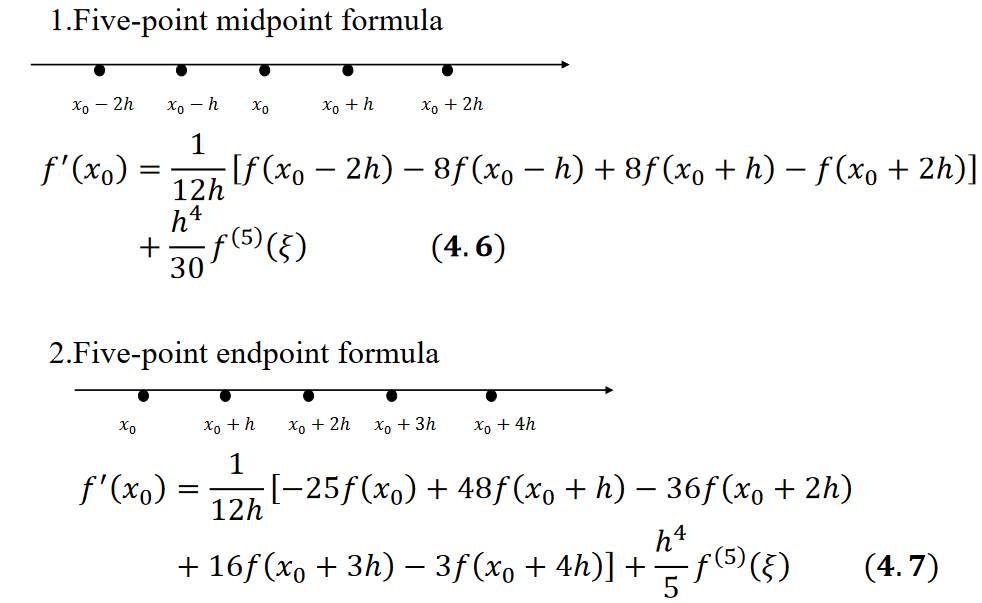


In [31]:
#Task_02 solution 

# code for five point endpoint and five point midpoint formulae for finding f'(x) for an array of x and f(x).
import numpy as np

def five_point(x, y):
  
    # Compute the step size h
    data=[]
    h = x[1] - x[0]
    
    # Compute the forward difference approximation
    tp = np.zeros_like(y)
    tp[0]=(-25*y[0]+48*y[1]-36*y[2]+16*y[3]-3*y[4])/(12*h) #five point endpoint (left end) formula
    tp[-1]=(25*y[-1]-48*y[-2]+36*y[-3]-16*y[-4]+3*y[-5])/(12*h) #five point endpoint (right end) formula

    data.append([x[0],y[0],tp[0]])
    for i in range(1,len(y)-1):
        tp[i] = (y[i+1] - y[i-1]) / (2*h)
        data.append([x[i],y[i],tp[i]])
    data.append([x[-1],y[-1],tp[-1]])

    print(tabulate(data,headers=['x','f(x)','df(x)/dx'],tablefmt="github"))
    
    
    return

In [32]:
# example to run above code

x=[0.2,0.4,0.6,0.8,1.0]
y=[]
for i in range(len(x)):
  y.append(x[i]**2)

five_point(x, y)

|   x |   f(x) |   df(x)/dx |
|-----|--------|------------|
| 0.2 |   0.04 |        0.4 |
| 0.4 |   0.16 |        0.8 |
| 0.6 |   0.36 |        1.2 |
| 0.8 |   0.64 |        1.6 |
| 1   |   1    |        2   |


## **How to take integral in python**

In [128]:
x = symbols('x')   #Make x a symbol  
f = 2*x/(x**2-4)      #Function to take integrate

I_actual = float(integrate(f, (x,1,1.6)))    #integrate(f,(x,l,u)) is used to take integral of f from l to u
print(I_actual)




-0.7339691750802008


##**Numerical Integration by using Composite Trapezoidal rule**
### Trapezoid Rule
$$\int_a^b f(x) dx \approx \frac{h}{2}[f(a)+ \sum_{i=1}^{n-1} {f(x_i)}+f(b)]$$


In [129]:
def comp_trapezoidal_rule(f, a, b, n=1):  #n=1 indicates simple trpezoidal rule
  h = (b - a) / n
  x = [a + i*h for i in range(n+1)]
  y = [f(xi) for xi in x]
  s = sum(y[1:-1])
  ans=h/2 * (y[0] + 2*s + y[-1])
  return ans

In [130]:

#Example for simple and composite Trapezoidal
def f(x):
  return(2*x/(x**2-4))
strap=comp_trapezoidal_rule(f,1,1.6)
print(strap) # gives ans of simple trapezoidal rule
ctrap=comp_trapezoidal_rule(f,1,1.6,4)
print(ctrap) # gives ans of composite trapezoidal rule with n=4

-0.866666666666667
-0.7435983879717899


**Computing Actual Error for simple and composite trapezoidal rules**




In [131]:
print(I_actual-strap)
print(I_actual-ctrap)

0.13269749158646627
0.009629212891589134


###**For calculating SimpleTrapezoidal error bound**

Working for Question no 3e Exercise 4.3



In [134]:
from sympy import* #Call Library of sympy
def f(x):
  return(2*x/(x**2-4))

def Error_bound_trap(f,l,u):#l is the lower limit and u is the upper limit of integral
   ddf = diff(f, x,2)    #Evaluating second derivative of f
   abs_max_ddf=max(abs(ddf.subs(x,l)),abs(ddf.subs(x,u)))
   h=u-l
   Error_bound=h**3*abs_max_ddf/12
   return(Error_bound,abs_max_ddf)

In [135]:
 Error_bound_trap(f,1,1.6)



/usr/local/lib/python3.9/dist-packages/sympy/core/function.py:1238: SymPyDeprecationWarning: 

The string fallback in sympify() is deprecated.

To explicitly convert the string form of an object, use
sympify(str(obj)). To add define sympify behavior on custom
objects, use sympy.core.sympify.converter or define obj._sympy_
(see the sympify() docstring).

sympify() performed the string fallback resulting in the following string:

'<function f at 0x7feb75150e50>'

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-sympify-string-fallback
for details.

This has been deprecated since SymPy version 1.6. It
will be removed in a future version of SymPy.

  expr = sympify(expr)


SympifyError: ignored

**Task 4: Make a code of composite simpson's 1/3rd rule (set n=2 for simple simpson and raise exception when user enters n=odd value) and run on f(x) mentioned in exercise # 4.3, Question 3 1e**

In [148]:
#Task 4

def comp_simpson_rule(f, a, b, n=2):  #n=2 indicates simple simpson rule
  if(n % 2 == 0):
    h = (b - a) / n
  else:
    raise Exception("N must be even")
  x = [a+i*h for i in range(n+1)]
  y = [f(xi) for xi in x]

  sum_even =0
  sum_odd =0
  for j in range(1, n): 
    if(j % 2) == 0:
      sum_even += y[j]
    else:
      sum_odd+=y[j]
  sum = h * (y[0] + 2*sum_even + 4*sum_odd + y[-1]) / 3
  return sum


In [150]:
#Example Code for Task 04
def f(x):
  return ((2*x)/(x**2-4))

approx_val = comp_simpson_rule(f, 1, 1.6, 8)
print("\nSimple Simpson Rule: ",comp_simpson_rule(f, 1, 1.6)) #Prints asnwer of simple simpson rule 
print("\nComposite Simpson Rule: ",approx_val) #Prints asnwer of composite simpson rule with n=4



Simple Simpson Rule:  -0.7391053391053394

Composite Simpson Rule:  -0.7340063101889207


**Task 5: Find Error bound for Exercise 4.3 Qno 1 part(e)**

**For calculating simple Simpson's 1/3rd rule error bound**

In [155]:
#Task 05
from sympy import* #Call Library of sympy
x = symbols('x')   #Make x a symbol  
f = ((2*x)/(x**2-4))       #Define your function here in 'x'

def Error_bound_simp(f, l, u, n=8): #l is the lower limit and u is the upper limit of integral and n is the number of nodes
   if(n % 2) != 0:
     raise Exception("\nN must be even")

   d4f = diff(f, x,4)    #Evaluating second derivative of f
   abs_max_ddf=max(abs(d4f.subs(x,l)),abs(d4f.subs(x,u)))
   h = (u-l)/ n 
   Error_bound=(u-l)*h**4*abs_max_ddf/180
   return(Error_bound,abs_max_ddf)

In [156]:
x = Error_bound_simp(f,1,1.6,8)

print("Error Bound is: ", x[0]) #Error Bound for Composite Simpson's Rule with n = 8
print("\nActual Value is: ", I_actual)
absolute_error =  abs(approx_val - I_actual)
print("Abosulte Error is: ",absolute_error)

if(x[0] > absolute_error):
  print("Error Bound Too Large, Numerical Method gives inaccurate answers")
else:
  print("Numerical method gives an accurate answer")


Error Bound is:  0.000247188196587792

Actual Value is:  -0.7339691750802008
Abosulte Error is:  3.713510871994341e-05
Error Bound Too Large, Numerical Method gives inaccurate answers


In [146]:
y1 = Error_bound_simp(f,1,1.6,2) 
print("Error Bound is: ",y1) #Error Bound for Simple Simpson's Rule

Error Bound is:  (0.0632801783264748, 2343.71030838795)
